In [ ]:
#################################################################################
# Author: Paulina Arregocés Guerra
# Research groups 
# GITA (Applied Telecommunications Research Group)  - Universidad de Antioquia 
# GIDIA (Artificial Intelligence Research Group) - Universidad Nacional de Colombia
#
# Last modified on 13/06/2023 
# Desciotion: This code is used to label the dataset and to train and test the decision # tree and support vector machine models with real data. 
#################################################################################

In [4]:
# Uncomment for requirement libraries versions
#!pip install -r requirements.txt 

  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached asttokens-2.0.8-py2.py3-none-any.whl (23 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached blis-0.7.8-cp310-cp310-win_amd64.whl (6.6 MB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached certifi-2022.9.14-py3-none-any.whl (162 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached colorama-0.4.5-py2.py3-none-any.whl (16 kB)
  Using cached confection-0.0.2-py3-none-any.whl (32 kB)
  Using cached contourpy-1.0.5-cp310-cp310-win_amd64.whl (164 kB)
  Using cached cymem-2.0.6-cp310-cp310-win_amd64.whl (36 kB)
  Using cached debugpy-1.6.3-cp310-cp310-win_amd64.whl (4.6 MB)
  Using cached dill-0.3.5.1-py2.py3-none-any.whl (95 kB)
  Using cached distlib-0.3.6-py2.py3-none-any.whl (468 kB)
  Using cached easygui-0.98.3-py2.py3-none-any.whl

ERROR: Ignored the following versions that require a different python version: 0.23.0 Requires-Python >=3.6, <3.10; 0.5.0 Requires-Python >=2.7,<3; 0.6.0 Requires-Python >=2.7,<=3.7; 0.9.0 Requires-Python >=2.7,<=3.7
ERROR: Could not find a version that satisfies the requirement torch==1.12.1+cu116 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.12.1+cu116


## CICIDS2017 
From this dataset we choose layer-4 destination port and bidirectional total amount of packets as a 80-bit input vector.

In [5]:
import pandas as pd
import numpy as np
from numpy import where
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import CondensedNearestNeighbour

from pylab import rcParams
from collections import Counter
import joblib  

In [6]:
# Read DataSet
Complete = pd.read_csv('.\CSV_TXT\data.csv')

## Data exploration

In [7]:
Complete.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
Complete.shape

(2830743, 79)

In [9]:
df_copy=Complete.copy()

In [10]:
df_copy.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [11]:
100 * df_copy[' Label'].value_counts() / len(df_copy[' Label'])

BENIGN                        80.300366
DoS Hulk                       8.162981
PortScan                       5.614427
DDoS                           4.522735
DoS GoldenEye                  0.363615
FTP-Patator                    0.280421
SSH-Patator                    0.208320
DoS slowloris                  0.204752
DoS Slowhttptest               0.194260
Bot                            0.069452
Web Attack � Brute Force       0.053237
Web Attack � XSS               0.023033
Infiltration                   0.001272
Web Attack � Sql Injection     0.000742
Heartbleed                     0.000389
Name:  Label, dtype: float64

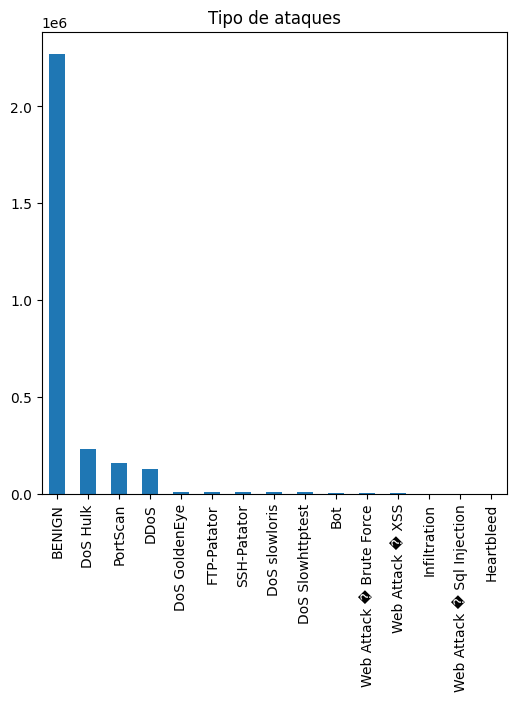

In [12]:
# Graphics attacks 
import matplotlib.pyplot as plt
plot = df_copy[' Label'].value_counts().plot(kind='bar', 
                                           figsize=(6, 6),
                                           title='Tipo de ataques')

In [13]:
df_copy.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object

In [14]:
attacks=df_copy[df_copy[' Label']!= 'BENIGN']

In [15]:
attacks[' Label'].value_counts()

DoS Hulk                      231073
PortScan                      158930
DDoS                          128027
DoS GoldenEye                  10293
FTP-Patator                     7938
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1966
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name:  Label, dtype: int64

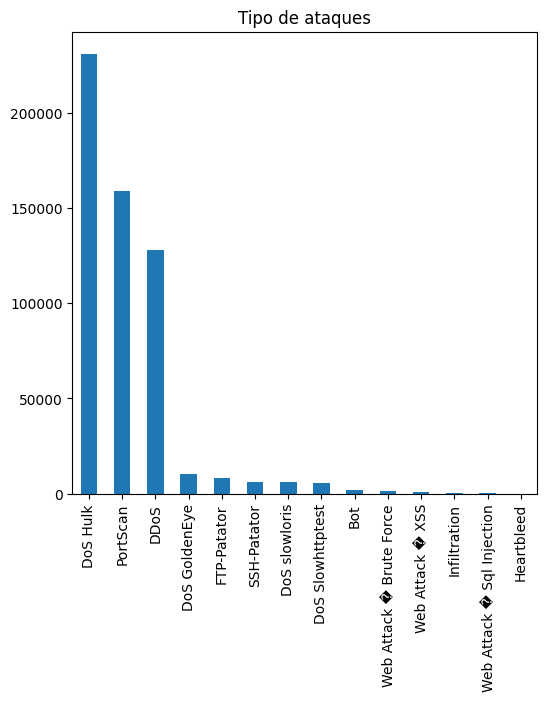

In [16]:
# Graphic attacks  
import matplotlib.pyplot as plt
plot = attacks[' Label'].value_counts().plot(kind='bar', 
                                           figsize=(6, 6),
                                           title='Tipo de ataques')

In [17]:
df_copy2=Complete.copy()

In [18]:
def change_label(label):
    if label == 'BENIGN': label = 0
    else:label = 1
    return label

In [19]:
df_copy2[' Label']=df_copy2[' Label'].apply(lambda x: f"{change_label(x)}")

In [20]:
df_copy2[' Label'].value_counts()

0    2273097
1     557646
Name:  Label, dtype: int64

In [21]:
# Cleaning data
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [22]:
copy2_clean=clean_dataset(df_copy2)
copy2_clean['Total Bi Packets'] = copy2_clean[' Total Fwd Packets'] +  copy2_clean[' Total Backward Packets'] 

In [23]:
copy2_clean[' Label'].value_counts()

0.0    2271320
1.0     556556
Name:  Label, dtype: int64

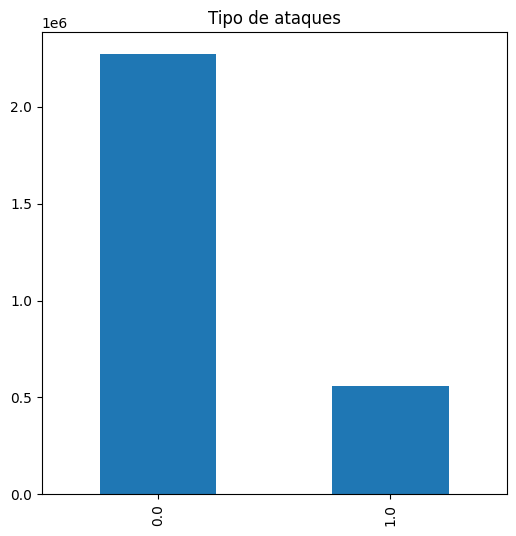

In [24]:
plot = copy2_clean[' Label'].value_counts().plot(kind='bar', 
                                           figsize=(6, 6),
                                           title='Tipo de ataques')

In [25]:
copy2_clean.shape

(2827876, 80)

## Data set separation

In [26]:
df_X= copy2_clean[{' Destination Port',' Total Fwd Packets',' Total Backward Packets'}] # features (3)
df_Y=copy2_clean[' Label']

C:\Users\Informatica\AppData\Local\Temp\ipykernel_18192\1944290118.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_X= copy2_clean[{' Destination Port',' Total Fwd Packets',' Total Backward Packets'}] # features (3)


## Balance Data

In [27]:
# Uncomment to run with Data reduced three features
x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y,random_state = 1, train_size=0.7)

os =  CondensedNearestNeighbour(n_neighbors=1, random_state=42)
X_train_bal, y_train_bal = os.fit_resample(x_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_bal)))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
xtrain_scaled3 = scaler.fit_transform(X_train_bal)
xtest_scaled3 = scaler.fit_transform(x_test)

# Decision Tree  


In [ ]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(random_state=0,max_depth= 25, min_samples_leaf=3, min_samples_split=20)
clf_tree = clf_tree.fit(xtrain_scaled3, y_train)

NameError: name 'xtrain_scaled3' is not defined

In [ ]:
y_predict_redu = clf_tree.predict(xtest_scaled3)

NameError: name 'xtest_scaled3' is not defined

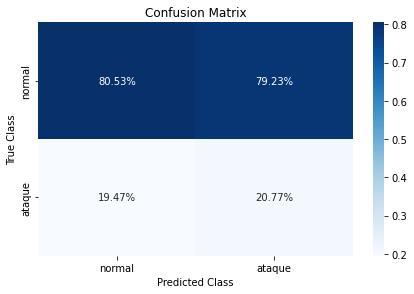

In [ ]:
Y_actual= y_test
Y_predict= y_predict_redu

# crear matriz de confusión
matrix= confusion_matrix(Y_actual,Y_predict)

# crear marco de datos de pandas Crear un conjunto de datos
class_names= ['normal','ataque']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# crear mapa de calor dibujar mapa de calor
sns.heatmap(dataframe/np.sum(dataframe), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy Score is', accuracy_score(Y_actual,Y_predict))
print('Classificaction Report')
print(classification_report(Y_actual,Y_predict))

Accuracy Score is 0.7195103982611217
Classificaction Report
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83    681576
         1.0       0.21      0.15      0.18    166787

    accuracy                           0.72    848363
   macro avg       0.51      0.51      0.50    848363
weighted avg       0.69      0.72      0.70    848363



In [ ]:
# Uncomment to save model  
joblib.dump(clf_tree, 'CICIDS_DT.pkl') 

In [ ]:
# Uncomment to upload model and test it  
clf_dt = joblib.load('CICIDS_DT.pkl')
clf_dt.score(xtest_scaled3, y_test)

# SVM

In [ ]:
# Get a sample of data 
copy3= copy2_clean.sample(frac=0.2)

In [ ]:
copy3[' Label'].value_counts()

0.0    454113
1.0    111462
Name:  Label, dtype: int64

In [ ]:
copy3['Total Bi Packets'] = copy3[' Total Fwd Packets'] +  copy3[' Total Backward Packets'] 

In [ ]:
df_X= copy3[{' Destination Port',' Total Fwd Packets',' Total Backward Packets'}] # Atributos seleccionados en el artículo 
df_Y=copy3[' Label']

In [ ]:
# Uncomment to run with Data reduced three features
x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y,random_state = 1, train_size=0.7)# entrenamiento, validación 

os =  CondensedNearestNeighbour(n_neighbors=1, random_state=42)
X_train_bal, y_train_bal = os.fit_resample(x_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_bal)))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
xtrain_scaled3 = scaler.fit_transform(X_train_bal)
xtest_scaled3 = scaler.fit_transform(x_test)

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=0.5, kernel='rbf', random_state=0)
clf = clf.fit(xtrain_scaled3, y_train)

In [ ]:
y_predict_SVM = clf.predict(xtest_scaled3)

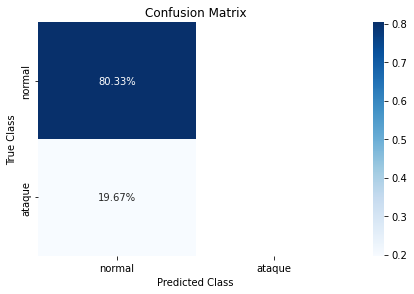

In [ ]:
Y_actual= y_test
Y_predict_SVM= y_predict_SVM

matrix= confusion_matrix(Y_actual,Y_predict_SVM)

class_names= ['normal','ataque']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe/np.sum(dataframe), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print('Accuracy Score is', accuracy_score(Y_actual,Y_predict_SVM))
print('Classificaction Report')
print(classification_report(Y_actual,Y_predict_SVM))

Accuracy Score is 0.803333470852758
Classificaction Report
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89    136304
         1.0       0.00      0.00      0.00     33369

    accuracy                           0.80    169673
   macro avg       0.40      0.50      0.45    169673
weighted avg       0.65      0.80      0.72    169673



/home/epit/Alianza_Interact/CICIDS2017/CICIDS/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/epit/Alianza_Interact/CICIDS2017/CICIDS/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/epit/Alianza_Interact/CICIDS2017/CICIDS/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [ ]:
# Uncomment to save model  
joblib.dump(clf, 'CICIDS_SVM.pkl') 

In [ ]:
# Uncomment to upload model and test it  
clf_svm = joblib.load('CICIDS_SVM.pkl')
clf_svm.score(xtest_scaled3, y_test)